## Project

We're trying to build a table

Rows are zip codes
Columns are housing prices and number of permits per year from 2007 - 

In [2]:
import csv    

with open('data_files/permits.csv', 'r') as infile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    
fieldnames

['objectid',
 'permitnumber',
 'addressobjectid',
 'parcel_id_num',
 'permittype',
 'permitdescription',
 'commercialorresidential',
 'typeofwork',
 'approvedscopeofwork',
 'permitissuedate',
 'status',
 'applicanttype',
 'contractorname',
 'contractoraddress1',
 'contractoraddress2',
 'contractorcity',
 'contractorstate',
 'contractorzip',
 'mostrecentinsp',
 'opa_account_num',
 'address',
 'unit_type',
 'unit_num',
 'zip',
 'censustract',
 'council_district',
 'opa_owner',
 'systemofrecord',
 'geocode_x',
 'geocode_y',
 'posse_jobid',
 'lat',
 'lng']

In [3]:
import pandas as pd
permits = pd.read_csv('data_files/permits.csv', dtype={'permitnumber':str, 'parcel_id_num':str})
permits.head()

,objectid,permitnumber,addressobjectid,parcel_id_num,permittype,permitdescription,commercialorresidential,typeofwork,approvedscopeofwork,permitissuedate,...,zip,censustract,council_district,opa_owner,systemofrecord,geocode_x,geocode_y,posse_jobid,lat,lng
0,32,100754,8402,336710,L_FFORM,FAST FORM BUILDING PERMIT,NaN,NaN,NaN,2007-09-04 16:41:02,...,19115-3402,344.0,10.0,CHEN ZHI QIANG ZHENG FANG,HANSEN,2.720980e+06,290557.097420,NaN,40.099475,-75.059753
1,2,100029,740935,534979,BP_ADMINST,ADMINISTRATIVE PERMIT,NaN,CO,CERTIFICATE OF OCCUPANCY,2007-08-30 16:37:33,...,19107-2403,2.0,1.0,CHIANG MAGGIE,HANSEN,2.696151e+06,236716.444730,NaN,39.953782,-75.154127
2,1017,240571,360472,132411,ZP_USE,USE PERMIT,NaN,SFRED,CREATE MOTHER IN LAW SUITE IN BASEMENT OF SFD.,2009-10-02 14:42:21,...,19136-2141,349.0,6.0,KAMDAR PRAPTI M KAMDAR MEHUL PANKAJ,HANSEN,2.735362e+06,271794.924559,NaN,40.046782,-75.010448
3,13,100212,17535,111870,PP_PLUMBNG,PLUMBING PERMIT,NaN,EZPLUM,"AREA DRAIN, BASEMENT: LT, WC, LAV, HWH, 1ST FL...",2007-08-31 13:56:52,...,19146-2907,21.0,2.0,GORDON JESSICA L,HANSEN,2.690311e+06,230662.085428,NaN,39.937639,-75.175576
4,43,100984,419501,188921,L_FFORM,FAST FORM BUILDING PERMIT,NaN,NaN,NaN,2007-09-05 16:24:13,...,19121-0000,138.0,5.0,MOSHER JENNIFER LYNN LANGHAM MICHAEL CHARLES,HANSEN,2.688834e+06,244955.524768,NaN,39.976977,-75.179360


In [79]:
permits['zipcode'] = permits['zip'].str.split('-', expand=True)[0]

In [80]:
permits.shape

(382478, 35)

In [13]:
permits['permitissuedate'] = pd.to_datetime(permits['permitissuedate'])

In [22]:
permits['permitissueyear'] = pd.DatetimeIndex(permits['permitissuedate']).year
permits['permitissueyear'].sort_values()

0         2007
268595    2007
268578    2007
268567    2007
268561    2007
          ... 
207142    2015
308607    2015
207144    2015
292296    2015
286527    2015
Name: permitissueyear, Length: 382478, dtype: int64

Years go from 2007 - 2015

In [82]:
list_of_zipcodes = [
    '19120', '19124', '19111', '19143',
'19134',
'19149',
'19148',
'19104',
'19140',
'19145',
'19139',
'19131',
'19144',
'19146',
'19147',
'19128',
'19135',
'19115',
'19141',
'19136',
'19154',
'19152',
'19151',
'19116',
'19121',
'19132',
'19114',
'19138',
'19142',
'19119',
'19125',
'19133',
'19130',
'19150',
'19103',
'19122',
'19126',
'19123',
'19107',
'19153',
'19106',
'19129',
'19118',
'19137',
'19102',
'19127',
'19019',
'19093',
'19092',
'19101',
'19099',
'19105',
'19109',
'19108',
'19110',
'19112',
'19160',
'19155',
'19162',
'19161',
'19171',
'19170',
'19173',
'19172',
'19176',
'19175',
'19178',
'19177',
'19181',
'19179',
'19183',
'19182',
'19185',
'19184',
'19188',
'19187',
'19192',
'19191',
'19194',
'19193',
'19196',
'19195',
'19244',
'19197',
'19255',
'19190']


In [288]:
permits['permitdescription'].value_counts()

PLUMBING PERMIT                 97518
ELECTRICAL PERMIT               70452
ALTERATION PERMIT               66810
MECHANICAL PERMIT               27327
ZONING/USE PERMIT               21541
USE PERMIT                      19030
ZONING PERMIT                   15495
SUPPRESSION PERMIT              14375
ADMINISTRATIVE PERMIT           14279
NEW CONSTRUCTION PERMIT          9461
DEMOLITION PERMIT                7478
OPERATIONS PERMIT                4947
ADDITION PERMIT                  4751
FAST FORM BUILDING PERMIT        4376
SIGN PERMIT                      2895
ZONING ADMIN REVIEW              1382
RESIDENTIAL BUILDING PERMIT       164
COMMERCIAL BUILDING PERMIT         93
GENERAL PERMIT MINOR               48
MECHANICAL / FUEL GAS PERMIT       27
FIRE SUPPRESSION PERMIT            18
SITE / UTILITY PERMIT               8
GENERAL PERMIT                      2
5-YEAR TANK TESTING                 1
Name: permitdescription, dtype: int64

In [ ]:
##### CHANGE BELOW

In [289]:
permit_col_list = [
    'ALTERATION PERMIT',
    'ZONING/USE PERMIT',
    'USE PERMIT',
    'ZONING PERMIT',                   
    'NEW CONSTRUCTION PERMIT',          
    'DEMOLITION PERMIT',                
    'ADDITION PERMIT',                  
    'FAST FORM BUILDING PERMIT',        
    'RESIDENTIAL BUILDING PERMIT',       
    'COMMERCIAL BUILDING PERMIT'
]


In [295]:
permits = permits[permits['permitdescription'].isin(permit_col_list)]

In [296]:
npermits1 = permits.groupby(['zipcode','permitissueyear'])['zipcode'].count().reset_index(name='permits')

In [ ]:
##### CHANGE ABOVE

In [297]:
npermits1_cleaned = npermits1[npermits1['zipcode'].isin(list_of_zipcodes)]

In [298]:
npermits1_cleaned

,zipcode,permitissueyear,permits
6,19102,2007,190
7,19102,2008,178
8,19102,2009,121
9,19102,2010,126
10,19102,2011,139
...,...,...,...
445,19154,2011,385
446,19154,2012,294
447,19154,2013,207
448,19154,2014,195


In [299]:
npermits1_cleaned['zipcode'].unique()

array(['19102', '19103', '19104', '19106', '19107', '19108', '19109',
       '19110', '19111', '19112', '19114', '19115', '19116', '19118',
       '19119', '19120', '19121', '19122', '19123', '19124', '19125',
       '19126', '19127', '19128', '19129', '19130', '19131', '19132',
       '19133', '19134', '19135', '19136', '19137', '19138', '19139',
       '19140', '19141', '19142', '19143', '19144', '19145', '19146',
       '19147', '19148', '19149', '19150', '19151', '19152', '19153',
       '19154'], dtype=object)

In [300]:
npermits1_cleaned[npermits1_cleaned['zipcode']=='19102']

,zipcode,permitissueyear,permits
6,19102,2007,190
7,19102,2008,178
8,19102,2009,121
9,19102,2010,126
10,19102,2011,139
11,19102,2012,139
12,19102,2013,170
13,19102,2014,160
14,19102,2015,261


In [301]:
permit1_data = []

for zipcode in npermits1_cleaned['zipcode'].unique():
    zip_dict = {}
    zip_dict['zipcode'] = zipcode
    for index,row in npermits1_cleaned[npermits1_cleaned['zipcode']==zipcode].iterrows():
        zip_dict["np_"+str(row['permitissueyear'])] = row['permits']
    permit1_data.append(zip_dict)

In [302]:
pdf1 = pd.DataFrame(permit1_data)
pdf1.head()

,zipcode,np_2007,np_2008,np_2009,np_2010,np_2011,np_2012,np_2013,np_2014,np_2015
0,19102,190,178,121.0,126,139.0,139.0,170.0,160,261.0
1,19103,814,740,526.0,520,641.0,696.0,726.0,816,846.0
2,19104,912,790,669.0,588,647.0,803.0,741.0,768,885.0
3,19106,469,396,231.0,267,349.0,348.0,376.0,402,379.0
4,19107,539,495,365.0,375,378.0,425.0,436.0,418,440.0


In [303]:
permits2 = pd.read_csv('data_files/permits-2.csv')
permits2.head()

,objectid,permitnumber,addressobjectid,parcel_id_num,permittype,permitdescription,commercialorresidential,typeofwork,approvedscopeofwork,permitissuedate,status,applicanttype,contractorname,contractoraddress1,contractoraddress2,contractorcity,contractorstate,contractorzip,mostrecentinsp,opa_account_num,address,unit_type,unit_num,zip,censustract,council_district,opa_owner,systemofrecord,geocode_x,geocode_y,posse_jobid,lat,lng
0,28,1007062,15597742.0,481868,FIRE SUPPRESSION,FIRE SUPPRESSION PERMIT,RESIDENTIAL,NEW CONSTRUCTION,FOR THE INSTALLATION OF A FIRE SUPPRESSION SYS...,2019-10-03 11:01:00,COMPLETED,OWNER,B M CONSULTING SERVICES INC,B M CONSULTING SERVICES INC\r\n1717 FAIRMOUNT ...,NaN,NaN,NaN,NaN,2021-01-04 13:30:15,141066300.0,1335 N FRANKLIN ST,NaN,NaN,19122-4325,141.0,5.0,STEIN MARC,ECLIPSE,2.697602e+06,243701.739648,191894414.0,39.972832,-75.148217
1,29,1007180,603633.0,333973,BP_FIRESUP,SUPPRESSION PERMIT,NaN,RELOCA,RELOCATE 145 EXISTING SPRINKLER HEADS,2019-09-11 11:13:33,COMPLETED,CONTRACTOR,TYCO FIRE & SECURITY MANAGEMEN,DBA JOHNSON CONTROL FIRE PROTECTION,283 GIBRALTAR RD,HORSHAM,PA,19044-,2019-10-09 14:45:00,882848800.0,5731-55 WAYNE AVE,NaN,NaN,19144-3313,241.0,8.0,GERMANTOWN EQUITIES LLC A NEW JERSEY LTD LIAB CO,HANSEN,2.688261e+06,265365.103270,NaN,40.033026,-75.179282
2,30,1007380,156586952.0,199356,PLUMBING,PLUMBING PERMIT,COMMERCIAL,NEW CONSTRUCTION OR ADDITIONS,INSTALL 18 FIXTURES AS PER 2004 PPC,2019-09-04 10:46:13,COMPLETED,OWNER,TURNER BROTHERS PLUMBING & HEATING LLC,TURNER BROTHERS PLUMBING & HEATING LLC\r\n3048...,NaN,NaN,NaN,NaN,2021-04-13 13:19:12,23175300.0,1303 KATER ST,NaN,NaN,19147-1818,15.0,2.0,606 LOFTS LLC,ECLIPSE,2.693602e+06,232748.621978,226806589.0,39.943100,-75.163628
3,31,1007520,499505.0,105368,BP_ALTER,ALTERATION PERMIT,NaN,MINOR,"ROOF REPLACEMENT, SINGLE PLY 1020 SF\r\nVINYL ...",2019-09-04 14:35:40,COMPLETED,CONTRACTOR,DMS GENERAL CONTRACTING INC,3322-26 TILTON ST,NaN,PHILADELPHIA,PA,19133-,2019-10-02 08:23:00,433239600.0,4254 N REESE ST,NaN,NaN,19140-2531,197.0,7.0,ROSADO MIGUEL A,HANSEN,2.700610e+06,259657.774849,NaN,40.016371,-75.135806
4,33,1007549,158279237.0,432779,BUILDING,COMMERCIAL BUILDING PERMIT,COMMERCIAL,ADDITION AND/OR ALTERATION,FOR LEVEL II ALTERATIONS TO EXISTING INTERIOR ...,2019-10-09 09:53:00,EXPIRED,PROFESSIONAL / TRADESPERSON,FRANK R LAMARRA BUILDERS & CON,FRANK R LAMARRA BUILDERS & CON\r\n959 E MAIN S...,NaN,NaN,NaN,NaN,2021-04-22 07:57:19,NaN,314 N 12TH ST,APT,204,19107-1138,376.0,1.0,NaN,ECLIPSE,2.694791e+06,238306.023900,217611319.0,39.958254,-75.158807


In [305]:
permits2['permitissuedate'] = pd.to_datetime(permits2['permitissuedate'])
permits2['permitissueyear'] = pd.DatetimeIndex(permits2['permitissuedate']).year
permits2['permitissueyear'].sort_values()

208225    2016
302998    2016
303000    2016
303001    2016
303005    2016
          ... 
32662     2022
153519    2022
153518    2022
125884    2022
61741     2022
Name: permitissueyear, Length: 120471, dtype: int64

Dates go from 2016 - 2022, total is 2007-2022. Let's look at Zillow info

In [306]:
permits2['zipcode'] = permits2['zip'].str.split('-', expand=True)[0]
permits2 = permits2[permits2['permitdescription'].isin(permit_col_list)]
npermits2 = permits2.groupby(['zipcode','permitissueyear'])['zipcode'].count().reset_index(name='permits')
npermits2_cleaned = npermits2[npermits2['zipcode'].isin(list_of_zipcodes)]
npermits2_cleaned

,zipcode,permitissueyear,permits
5,19102,2016,224
6,19102,2017,195
7,19102,2018,192
8,19102,2019,165
9,19102,2020,70
...,...,...,...
352,19154,2022,39
353,19192,2016,2
354,19192,2019,3
355,19192,2020,2


In [307]:
permit2_data = []

for zipcode in npermits2_cleaned['zipcode'].unique():
    zip_dict = {}
    zip_dict['zipcode'] = zipcode
    for index,row in npermits2_cleaned[npermits2_cleaned['zipcode']==zipcode].iterrows():
        zip_dict["np_"+str(row['permitissueyear'])] = row['permits']
    permit2_data.append(zip_dict)

In [308]:
pdf2 = pd.DataFrame(permit2_data)
pdf2.head()

,zipcode,np_2016,np_2017,np_2018,np_2019,np_2020,np_2021,np_2022
0,19102,224.0,195.0,192.0,165.0,70.0,88,50.0
1,19103,781.0,768.0,771.0,660.0,405.0,412,243.0
2,19104,815.0,826.0,1023.0,1012.0,747.0,916,416.0
3,19105,NaN,NaN,NaN,NaN,2.0,4,NaN
4,19106,409.0,418.0,451.0,357.0,180.0,237,136.0


In [33]:
zillow = pd.read_csv('data_files/ZillowHomeValues.csv')
zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329164.0,...,1153364.0,1152736.0,1153314.0,1159292.0,1171216.0,1190200.0,1207107.0,1221417.0,1227148.0,1234232.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,311718.0,...,523727.0,526511.0,528499.0,529879.0,530092.0,532758.0,534840.0,539859.0,543658.0,546709.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,510209.0,...,1517150.0,1521442.0,1521759.0,1532449.0,1542269.0,1559390.0,1572653.0,1591368.0,1600569.0,1607770.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,224385.0,...,428419.0,435498.0,441231.0,447322.0,456848.0,468519.0,482272.0,493709.0,501230.0,503505.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,407594.0,...,669648.0,674293.0,677215.0,679126.0,678889.0,681982.0,684421.0,690214.0,695114.0,698644.0


In [259]:
zillow_philly = zillow[zillow['City'] == 'Philadelphia']
zillow_philly

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
125,65810,126,19143,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,60701.0,61009.0,61132.0,61497.0,62089.0,62804.0,63377.0,63925.0,64313.0,64609.0,64756.0,65187.0,65676.0,65861.0,65823.0,66081.0,66273.0,66797.0,67099.0,67641.0,67686.0,67959.0,68203.0,68695.0,68447.0,68180.0,67802.0,67913.0,68143.0,68498.0,68586.0,68493.0,68414.0,68426.0,68588.0,68758.0,69396.0,70405.0,71333.0,72108.0,71545.0,70832.0,69969.0,69189.0,68933.0,68952.0,69436.0,69497.0,69166.0,68806.0,68433.0,67859.0,68503.0,69640.0,72312.0,74534.0,76922.0,77949.0,78439.0,78686.0,79661.0,81557.0,83961.0,86307.0,88384.0,90337.0,92085.0,93843.0,95070.0,96082.0,96754.0,97226.0,97366.0,97250.0,97431.0,98005.0,98827.0,99968.0,101264.0,102415.0,102880.0,103031.0,103011.0,103479.0,104487.0,105486.0,106479.0,107086.0,107907.0,108633.0,109295.0,109709.0,109799.0,110175.0,110832.0,111722.0,111804.0,112139.0,111773.0,111921.0,111393.0,111219.0,110379

In [260]:
zillow_philly.shape

(49, 280)

In [261]:
groupby_dict = {}

year_list = [str(x) for x in range(2007,2022)]

for col in zillow_philly.columns:
    for year in year_list:
        if year in col:
            groupby_dict[col] = 'hv_'+year
groupby_dict['RegionName'] = 'RegionName'

zillow_philly_condensed = zillow_philly.groupby(groupby_dict, axis = 1).mean()

In [262]:
zillow_philly_condensed.head()

,RegionName,hv_2007,hv_2008,hv_2009,hv_2010,hv_2011,hv_2012,hv_2013,hv_2014,hv_2015,hv_2016,hv_2017,hv_2018,hv_2019,hv_2020,hv_2021
125,19143.0,108467.500000,109798.166667,102126.750000,100015.166667,91745.833333,79605.416667,77684.250000,78044.416667,78708.583333,78576.666667,82954.000000,104098.166667,123322.583333,146060.000000,171926.833333
247,19111.0,184195.916667,178210.416667,167529.750000,167488.083333,158836.250000,155074.500000,153163.083333,152171.250000,155395.166667,158591.000000,170341.416667,183692.250000,200591.583333,214182.916667,247904.250000
338,19124.0,98639.250000,97578.500000,92638.166667,91818.166667,86595.416667,83713.500000,78975.666667,80194.083333,83110.916667,85427.416667,92145.750000,103423.833333,115630.666667,129380.000000,150156.750000
423,19120.0,111093.166667,109969.500000,104448.500000,104789.000000,99707.083333,93737.666667,87028.750000,87586.166667,89659.000000,91216.500000,98590.416667,108835.750000,120191.500000,133184.333333,154988.833333
509,19104.0,130982.000000,135507.666667,139226.166667,141402.583333,120080.166667,94038.166667,106057.250000,108781.333333,128183.666667,129940.500000,139072.416667,164660.000000,178046.333333,194805.083333,220964.166667


In [263]:
zillow_philly_condensed['RegionName'] = zillow_philly_condensed['RegionName'].astype('int').astype('str')

In [264]:
zillow_philly_condensed.head()

,RegionName,hv_2007,hv_2008,hv_2009,hv_2010,hv_2011,hv_2012,hv_2013,hv_2014,hv_2015,hv_2016,hv_2017,hv_2018,hv_2019,hv_2020,hv_2021
125,19143,108467.500000,109798.166667,102126.750000,100015.166667,91745.833333,79605.416667,77684.250000,78044.416667,78708.583333,78576.666667,82954.000000,104098.166667,123322.583333,146060.000000,171926.833333
247,19111,184195.916667,178210.416667,167529.750000,167488.083333,158836.250000,155074.500000,153163.083333,152171.250000,155395.166667,158591.000000,170341.416667,183692.250000,200591.583333,214182.916667,247904.250000
338,19124,98639.250000,97578.500000,92638.166667,91818.166667,86595.416667,83713.500000,78975.666667,80194.083333,83110.916667,85427.416667,92145.750000,103423.833333,115630.666667,129380.000000,150156.750000
423,19120,111093.166667,109969.500000,104448.500000,104789.000000,99707.083333,93737.666667,87028.750000,87586.166667,89659.000000,91216.500000,98590.416667,108835.750000,120191.500000,133184.333333,154988.833333
509,19104,130982.000000,135507.666667,139226.166667,141402.583333,120080.166667,94038.166667,106057.250000,108781.333333,128183.666667,129940.500000,139072.416667,164660.000000,178046.333333,194805.083333,220964.166667


In [265]:
zillow_philly_cleaned = zillow_philly_condensed[zillow_philly_condensed['RegionName'].isin(list_of_zipcodes)]
zillow_philly_cleaned = zillow_philly_cleaned.rename(columns={"RegionName": "zipcode"})
zillow_philly_cleaned.head()

,zipcode,hv_2007,hv_2008,hv_2009,hv_2010,hv_2011,hv_2012,hv_2013,hv_2014,hv_2015,hv_2016,hv_2017,hv_2018,hv_2019,hv_2020,hv_2021
125,19143,108467.500000,109798.166667,102126.750000,100015.166667,91745.833333,79605.416667,77684.250000,78044.416667,78708.583333,78576.666667,82954.000000,104098.166667,123322.583333,146060.000000,171926.833333
247,19111,184195.916667,178210.416667,167529.750000,167488.083333,158836.250000,155074.500000,153163.083333,152171.250000,155395.166667,158591.000000,170341.416667,183692.250000,200591.583333,214182.916667,247904.250000
338,19124,98639.250000,97578.500000,92638.166667,91818.166667,86595.416667,83713.500000,78975.666667,80194.083333,83110.916667,85427.416667,92145.750000,103423.833333,115630.666667,129380.000000,150156.750000
423,19120,111093.166667,109969.500000,104448.500000,104789.000000,99707.083333,93737.666667,87028.750000,87586.166667,89659.000000,91216.500000,98590.416667,108835.750000,120191.500000,133184.333333,154988.833333
509,19104,130982.000000,135507.666667,139226.166667,141402.583333,120080.166667,94038.166667,106057.250000,108781.333333,128183.666667,129940.500000,139072.416667,164660.000000,178046.333333,194805.083333,220964.166667


In [179]:
pdf1.head()

,zipcode,np_2007,np_2008,np_2009,np_2010,np_2011,np_2012,np_2013,np_2014,np_2015
0,19102,557.0,875,370.0,424.0,463.0,354.0,507.0,533.0,744.0
1,19103,2467.0,2275,1334.0,1566.0,1929.0,2105.0,2165.0,2500.0,2576.0
2,19104,2243.0,2136,1769.0,1771.0,1965.0,2124.0,2163.0,2248.0,2482.0
3,19106,1216.0,1015,603.0,681.0,756.0,744.0,934.0,1013.0,1106.0
4,19107,1434.0,1360,899.0,1007.0,998.0,1246.0,1178.0,1134.0,1164.0


In [180]:
pdf2.head()

,zipcode,np_2016,np_2017,np_2018,np_2019,np_2020,np_2021,np_2022
0,19102,769.0,567.0,589.0,545.0,280,292,156.0
1,19103,2565.0,2461.0,2543.0,2463.0,1463,1343,785.0
2,19104,2439.0,2600.0,2780.0,3015.0,2318,2566,1334.0
3,19105,NaN,NaN,NaN,NaN,2,4,NaN
4,19106,1066.0,1318.0,1340.0,1076.0,611,664,391.0


In [266]:
zillow_philly_cleaned.head()

,zipcode,hv_2007,hv_2008,hv_2009,hv_2010,hv_2011,hv_2012,hv_2013,hv_2014,hv_2015,hv_2016,hv_2017,hv_2018,hv_2019,hv_2020,hv_2021
125,19143,108467.500000,109798.166667,102126.750000,100015.166667,91745.833333,79605.416667,77684.250000,78044.416667,78708.583333,78576.666667,82954.000000,104098.166667,123322.583333,146060.000000,171926.833333
247,19111,184195.916667,178210.416667,167529.750000,167488.083333,158836.250000,155074.500000,153163.083333,152171.250000,155395.166667,158591.000000,170341.416667,183692.250000,200591.583333,214182.916667,247904.250000
338,19124,98639.250000,97578.500000,92638.166667,91818.166667,86595.416667,83713.500000,78975.666667,80194.083333,83110.916667,85427.416667,92145.750000,103423.833333,115630.666667,129380.000000,150156.750000
423,19120,111093.166667,109969.500000,104448.500000,104789.000000,99707.083333,93737.666667,87028.750000,87586.166667,89659.000000,91216.500000,98590.416667,108835.750000,120191.500000,133184.333333,154988.833333
509,19104,130982.000000,135507.666667,139226.166667,141402.583333,120080.166667,94038.166667,106057.250000,108781.333333,128183.666667,129940.500000,139072.416667,164660.000000,178046.333333,194805.083333,220964.166667


In [267]:
zpchc = zillow_philly_cleaned.copy()
zpchc.head()

,zipcode,hv_2007,hv_2008,hv_2009,hv_2010,hv_2011,hv_2012,hv_2013,hv_2014,hv_2015,hv_2016,hv_2017,hv_2018,hv_2019,hv_2020,hv_2021
125,19143,108467.500000,109798.166667,102126.750000,100015.166667,91745.833333,79605.416667,77684.250000,78044.416667,78708.583333,78576.666667,82954.000000,104098.166667,123322.583333,146060.000000,171926.833333
247,19111,184195.916667,178210.416667,167529.750000,167488.083333,158836.250000,155074.500000,153163.083333,152171.250000,155395.166667,158591.000000,170341.416667,183692.250000,200591.583333,214182.916667,247904.250000
338,19124,98639.250000,97578.500000,92638.166667,91818.166667,86595.416667,83713.500000,78975.666667,80194.083333,83110.916667,85427.416667,92145.750000,103423.833333,115630.666667,129380.000000,150156.750000
423,19120,111093.166667,109969.500000,104448.500000,104789.000000,99707.083333,93737.666667,87028.750000,87586.166667,89659.000000,91216.500000,98590.416667,108835.750000,120191.500000,133184.333333,154988.833333
509,19104,130982.000000,135507.666667,139226.166667,141402.583333,120080.166667,94038.166667,106057.250000,108781.333333,128183.666667,129940.500000,139072.416667,164660.000000,178046.333333,194805.083333,220964.166667


In [268]:
for i in range(0,len(year_list)):
    year1 = year_list[i]
    j = i+1
    while j < len(year_list):
        year2 = year_list[j]
        zpchc['hc_'+year1+'-'+year2] = zpchc['hv_'+year2] - zpchc['hv_'+year1]
        j += 1
    
len(zpchc.columns)

/var/folders/1b/w1kczxkd6c35q23928bnt7ch0000gn/T/ipykernel_3366/2172972740.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  zpchc['hc_'+year1+'-'+year2] = zpchc['hv_'+year2] - zpchc['hv_'+year1]
/var/folders/1b/w1kczxkd6c35q23928bnt7ch0000gn/T/ipykernel_3366/2172972740.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  zpchc['hc_'+year1+'-'+year2] = zpchc['hv_'+year2] - zpchc['hv_'+year1]
/var/folders/1b/w1kczxkd6c35q23928bnt7ch0000gn/T/ipykernel_3366/2172972740.py:6: PerformanceWarning: DataFrame is highly fragmented.  This

121

In [269]:
pd.options.display.max_columns = None
zpchc.head()

,zipcode,hv_2007,hv_2008,hv_2009,hv_2010,hv_2011,hv_2012,hv_2013,hv_2014,hv_2015,hv_2016,hv_2017,hv_2018,hv_2019,hv_2020,hv_2021,hc_2007-2008,hc_2007-2009,hc_2007-2010,hc_2007-2011,hc_2007-2012,hc_2007-2013,hc_2007-2014,hc_2007-2015,hc_2007-2016,hc_2007-2017,hc_2007-2018,hc_2007-2019,hc_2007-2020,hc_2007-2021,hc_2008-2009,hc_2008-2010,hc_2008-2011,hc_2008-2012,hc_2008-2013,hc_2008-2014,hc_2008-2015,hc_2008-2016,hc_2008-2017,hc_2008-2018,hc_2008-2019,hc_2008-2020,hc_2008-2021,hc_2009-2010,hc_2009-2011,hc_2009-2012,hc_2009-2013,hc_2009-2014,hc_2009-2015,hc_2009-2016,hc_2009-2017,hc_2009-2018,hc_2009-2019,hc_2009-2020,hc_2009-2021,hc_2010-2011,hc_2010-2012,hc_2010-2013,hc_2010-2014,hc_2010-2015,hc_2010-2016,hc_2010-2017,hc_2010-2018,hc_2010-2019,hc_2010-2020,hc_2010-2021,hc_2011-2012,hc_2011-2013,hc_2011-2014,hc_2011-2015,hc_2011-2016,hc_2011-2017,hc_2011-2018,hc_2011-2019,hc_2011-2020,hc_2011-2021,hc_2012-2013,hc_2012-2014,hc_2012-2015,hc_2012-2016,hc_2012-2017,hc_2012-2018,hc_2012-2019,hc_2012-2020,hc_2012-2021,hc_2013-2014,hc_2013-2015,hc_2013-2016,hc_2013-2017,hc_2013-2018,hc_2013-2019,hc_2013-2020,hc_2013-2021,hc_2014-2015,hc_2014-2016,hc_2014-2017,hc_2014-2018,hc_2014-2019,hc_2014-2020,hc_2014-2021,hc_2015-2016,hc_2015-2017,hc_2015-2018,hc_2015-2019,hc_2015-2020,hc_2015-2021,hc_2016-2017,hc_2016-2018,hc_2016-2019,hc_2016-2020,hc_2016-2021,hc_2017-2018,hc_2017-2019,hc_2017-2020,hc_2017-2021,hc_2018-2019,hc_2018-2020,hc_2018-2021,hc_2019-2020,hc_2019-2021,hc_2020-2021
125,19143,108467.500000,109798.166667,102126.750000,100015.166667,91745.833333,79605.416667,77684.250000,78044.416667,78708.583333,78576.666667,82954.000000,104098.166667,123322.583333,146060.000000,171926.833333,1330.666667,-6340.750000,-8452.333333,-16721.666667,-28862.083333,-30783.250000,-30423.083333,-29758.916667,-29890.833333,-25513.500000,-4369.333333,14855.083333,37592.500000,63459.333333,-7671.416667,-9783.000000,-18052.333333,-30192.750000,-32113.916667,-31753.750000,-31089.583333,-31221.500000,-26844.166667,-5700.000000,13524.416667,36261.833333,62128.666667,-2111.583333,-10380.916667,-22521.333333,-24442.500000,-24082.333333,-23418.166667,-23550.083333,-19172.750000,1971.416667,21195.833333,43933.250000,69800.083333,-8269.333333,-20409.750000,-22330.916667,-21970.750000,-21306.583333,-21438.500000,-17061.166667,4083.000000,23307.416667,46044.833333,71911.666667,-12140.416667,-14061.583333,-13701.416667,-13037.250000,-13169.166667,-8791.833333,12352.333333,31576.750000,54314.166667,80181.000000,-1921.166667,-1561.000000,-896.833333,-1028.750000,3348.583333,24492.750000,43717.166667,66454.583333,92321.416667,360.166667,1024.333333,892.416667,5269.750000,26413.916667,45638.333333,68375.750000,94242.583333,664.166667,532.250000,4909.583333,26053.750000,45278.166667,68015.583333,93882.416667,-131.916667,4245.416667,25389.583333,44614.000000,67351.416667,93218.250000,4377.333333,25521.500000,44745.916667,67483.333333,93350.166667,21144.166667,40368.583333,63106.000000,88972.833333,19224.416667,41961.833333,67828.666667,22737.416667,48604.250000,25866.833333
247,19111,184195.916667,178210.416667,167529.750000,167488.083333,158836.250000,155074.500000,153163.083333,152171.250000,155395.166667,158591.000000,170341.416667,183692.250000,200591.583333,214182.916667,247904.250000,-5985.500000,-16666.166667,-16707.833333,-25359.666667,-29121.416667,-31032.833333,-32024.666667,-28800.750000,-25604.916667,-13854.500000,-503.666667,16395.666667,29987.000000,63708.333333,-10680.666667,-10722.333333,-19374.166667,-23135.916667,-25047.333333,-26039.166667,-22815.250000,-19619.416667,-7869.000000,5481.833333,22381.166667,35972.500000,69693.833333,-41.666667,-8693.500000,-12455.250000,-14366.666667,-15358.500000,-12134.583333,-8938.750000,2811.666667,16162.500000,33061.833333,46653.166667,80374.500000,-8651.833333,-12413.583333,-14325.000000,-15316.833333,-12092.916667,-8897.083333,2853.333333,16204.166667,33103.500000,46694.833333,80416.166667,-3761.750000,-5673.166667,

In [309]:
pdf = pd.merge(pdf1, pdf2, on='zipcode')
housing_data = pd.merge(pdf, zpchc, on='zipcode')
housing_data.set_index('zipcode', inplace=True)
housing_data.head()

,np_2007,np_2008,np_2009,np_2010,np_2011,np_2012,np_2013,np_2014,np_2015,np_2016,np_2017,np_2018,np_2019,np_2020,np_2021,np_2022,hv_2007,hv_2008,hv_2009,hv_2010,hv_2011,hv_2012,hv_2013,hv_2014,hv_2015,hv_2016,hv_2017,hv_2018,hv_2019,hv_2020,hv_2021,hc_2007-2008,hc_2007-2009,hc_2007-2010,hc_2007-2011,hc_2007-2012,hc_2007-2013,hc_2007-2014,hc_2007-2015,hc_2007-2016,hc_2007-2017,hc_2007-2018,hc_2007-2019,hc_2007-2020,hc_2007-2021,hc_2008-2009,hc_2008-2010,hc_2008-2011,hc_2008-2012,hc_2008-2013,hc_2008-2014,hc_2008-2015,hc_2008-2016,hc_2008-2017,hc_2008-2018,hc_2008-2019,hc_2008-2020,hc_2008-2021,hc_2009-2010,hc_2009-2011,hc_2009-2012,hc_2009-2013,hc_2009-2014,hc_2009-2015,hc_2009-2016,hc_2009-2017,hc_2009-2018,hc_2009-2019,hc_2009-2020,hc_2009-2021,hc_2010-2011,hc_2010-2012,hc_2010-2013,hc_2010-2014,hc_2010-2015,hc_2010-2016,hc_2010-2017,hc_2010-2018,hc_2010-2019,hc_2010-2020,hc_2010-2021,hc_2011-2012,hc_2011-2013,hc_2011-2014,hc_2011-2015,hc_2011-2016,hc_2011-2017,hc_2011-2018,hc_2011-2019,hc_2011-2020,hc_2011-2021,hc_2012-2013,hc_2012-2014,hc_2012-2015,hc_2012-2016,hc_2012-2017,hc_2012-2018,hc_2012-2019,hc_2012-2020,hc_2012-2021,hc_2013-2014,hc_2013-2015,hc_2013-2016,hc_2013-2017,hc_2013-2018,hc_2013-2019,hc_2013-2020,hc_2013-2021,hc_2014-2015,hc_2014-2016,hc_2014-2017,hc_2014-2018,hc_2014-2019,hc_2014-2020,hc_2014-2021,hc_2015-2016,hc_2015-2017,hc_2015-2018,hc_2015-2019,hc_2015-2020,hc_2015-2021,hc_2016-2017,hc_2016-2018,hc_2016-2019,hc_2016-2020,hc_2016-2021,hc_2017-2018,hc_2017-2019,hc_2017-2020,hc_2017-2021,hc_2018-2019,hc_2018-2020,hc_2018-2021,hc_2019-2020,hc_2019-2021,hc_2020-2021
zipcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19102,190,178,121.0,126,139.0,139.0,170.0,160,261.0,224.0,195.0,192.0,165.0,70.0,88,50.0,374516.250000,376604.416667,365844.250000,350226.333333,322669.166667,320223.500000,328017.833333,342118.583333,348017.000000,350041.750000,362175.250000,360640.500000,351851.166667,351634.333333,351424.750000,2088.166667,-8672.000000,-24289.916667,-51847.083333,-54292.750000,-46498.416667,-32397.666667,-26499.250000,-24474.500000,-12341.000000,-13875.750000,-22665.083333,-22881.916667,-23091.500000,-10760.166667,-26378.083333,-53935.250000,-56380.916667,-48586.583333,-34485.833333,-28587.416667,-26562.666667,-14429.166667,-15963.916667,-24753.250000,-24970.083333,-25179.666667,-15617.916667,-43175.083333,-45620.750000,-37826.416667,-23725.666667,-17827.250000,-15802.500000,-3669.000000,-5203.750000,-13993.083333,-14209.916667,-14419.500000,-27557.166667,-30002.833333,-22208.500000,-8107.750000,-2209.333333,-184.583333,11948.916667,10414.166667,1624.833333,1408.000000,1198.416667,-2445.666667,5348.666667,19449.416667,25347.833333,27372.583333,39506.083333,37971.333333,29182.000000,28965.166667,28755.583333,7794.333333,21895.083333,27793.500000,29818.250000,41951.750000,40417.000000,31627.666667,31410.833333,31201.250000,14100.750000,19999.166667,22023.916667,34157.416667,32622.666667,23833.333333,23616.500000,23406.916667,5898.416667,7923.166667,20056.666667,18521.916667,9732.583333,9515.750000,9306.166667,2024.750000,14158.250000,12623.500000,3834.166667,3617.333333,3407.750000,12133.500000,10598.750000,1809.416667,1592.583333,1383.000000,-1534.750000,-10324.083333,-10540.916667,-10750.500000,-8789.333333,-9006.166667,-9215.750000,-216.833333,-426.416667,-209.583333
19103,814,740,526.0,520,641.0,696.0,726.0,816,846.0,781.0,768.0,771.0,660.0,405.0,412,243.0,478987.666667,480465.750000,455700.833333,429674.333333,395331.000000,393150.916667,402539.000000,422837.250000,439717.083333,441381.666667,461093.250000,477615.166667,481006.583333,483876.333333,491594.666667,1478.083333,-23286.833333,-49313.333333,-83656.666667,-85836.750000,-76448.666667,-56150.416667,-39270.583333,-37606.000000,-17894.416667,-1372.500000,2018.916667,4888.666667,12607.000000,-24764.916667,-50791.416667,-85134.750000,-87314.833333,-77926.750000

In [271]:
housing_data.columns

Index(['np_2007', 'np_2008', 'np_2009', 'np_2010', 'np_2011', 'np_2012',
       'np_2013', 'np_2014', 'np_2015', 'np_2016',
       ...
       'hc_2017-2018', 'hc_2017-2019', 'hc_2017-2020', 'hc_2017-2021',
       'hc_2018-2019', 'hc_2018-2020', 'hc_2018-2021', 'hc_2019-2020',
       'hc_2019-2021', 'hc_2020-2021'],
      dtype='object', length=136)

In [ ]:
0,1,2,3,4,5,6,7,8,9,10,11,12,13

In [ ]:
groupby_dict = {}

for year in zillow_philly.columns:
    for year in year_list:
        if year in col:
            groupby_dict[col] = 'hv_'+year
groupby_dict['RegionName'] = 'RegionName'

zillow_philly_condensed = zillow_philly.groupby(groupby_dict, axis = 1).mean()

In [331]:
housing_data.corr().loc['np_'+'2015', housing_data.columns.str.match('hc_'+'2015')]

hc_2015-2016    0.370954
hc_2015-2017    0.476500
hc_2015-2018    0.599586
hc_2015-2019    0.444629
hc_2015-2020    0.385081
hc_2015-2021    0.199552
Name: np_2015, dtype: float64

In [317]:
for year in year_list:
    print(year, housing_data.corr().loc['np_'+year, housing_data.columns.str.match('hc_'+year)])

2007 hc_2007-2008   -0.143917
hc_2007-2009   -0.136992
hc_2007-2010   -0.229563
hc_2007-2011   -0.276684
hc_2007-2012   -0.392262
hc_2007-2013   -0.189107
hc_2007-2014    0.002286
hc_2007-2015    0.205230
hc_2007-2016    0.218575
hc_2007-2017    0.326343
hc_2007-2018    0.388759
hc_2007-2019    0.315857
hc_2007-2020    0.280414
hc_2007-2021    0.150673
Name: np_2007, dtype: float64
2008 hc_2008-2009   -0.163401
hc_2008-2010   -0.246971
hc_2008-2011   -0.290272
hc_2008-2012   -0.414460
hc_2008-2013   -0.206469
hc_2008-2014   -0.003248
hc_2008-2015    0.208303
hc_2008-2016    0.216059
hc_2008-2017    0.312309
hc_2008-2018    0.375771
hc_2008-2019    0.329137
hc_2008-2020    0.304558
hc_2008-2021    0.205971
Name: np_2008, dtype: float64
2009 hc_2009-2010   -0.254218
hc_2009-2011   -0.249607
hc_2009-2012   -0.375550
hc_2009-2013   -0.140779
hc_2009-2014    0.099472
hc_2009-2015    0.285568
hc_2009-2016    0.247776
hc_2009-2017    0.327571
hc_2009-2018    0.391226
hc_2009-2019    0.364806


In [310]:
for year in year_list:
    print(year, housing_data.corr().loc['np_'+year, housing_data.columns.str.match('hc_'+year)].max())

2007 0.38875902836239595
2008 0.37577141189729374
2009 0.39122643067841845
2010 0.5053045301176482
2011 0.5957289800245477
2012 0.7053849581731143
2013 0.6719672794802872
2014 0.6760284603883986
2015 0.5995864645308319
2016 0.6950187130841633
2017 0.6467954151163899
2018 0.0708352313100799
2019 0.1367599131109202
2020 -0.2043205767641233
2021 nan


In [334]:
np_cols = housing_data.columns.str.match('np_')
hc_cols = housing_data.columns.str.match('hc_')

corr = housing_data.corr().loc[np_cols, hc_cols]
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

# corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,hc_2007-2008,hc_2007-2009,hc_2007-2010,hc_2007-2011,hc_2007-2012,hc_2007-2013,hc_2007-2014,hc_2007-2015,hc_2007-2016,hc_2007-2017,hc_2007-2018,hc_2007-2019,hc_2007-2020,hc_2007-2021,hc_2008-2009,hc_2008-2010,hc_2008-2011,hc_2008-2012,hc_2008-2013,hc_2008-2014,hc_2008-2015,hc_2008-2016,hc_2008-2017,hc_2008-2018,hc_2008-2019,hc_2008-2020,hc_2008-2021,hc_2009-2010,hc_2009-2011,hc_2009-2012,hc_2009-2013,hc_2009-2014,hc_2009-2015,hc_2009-2016,hc_2009-2017,hc_2009-2018,hc_2009-2019,hc_2009-2020,hc_2009-2021,hc_2010-2011,hc_2010-2012,hc_2010-2013,hc_2010-2014,hc_2010-2015,hc_2010-2016,hc_2010-2017,hc_2010-2018,hc_2010-2019,hc_2010-2020,hc_2010-2021,hc_2011-2012,hc_2011-2013,hc_2011-2014,hc_2011-2015,hc_2011-2016,hc_2011-2017,hc_2011-2018,hc_2011-2019,hc_2011-2020,hc_2011-2021,hc_2012-2013,hc_2012-2014,hc_2012-2015,hc_2012-2016,hc_2012-2017,hc_2012-2018,hc_2012-2019,hc_2012-2020,hc_2012-2021,hc_2013-2014,hc_2013-2015,hc_2013-2016,hc_2013-2017,hc_2013-2018,hc_2013-2019,hc_2013-2020,hc_2013-2021,hc_2014-2015,hc_2014-2016,hc_2014-2017,hc_2014-2018,hc_2014-2019,hc_2014-2020,hc_2014-2021,hc_2015-2016,hc_2015-2017,hc_2015-2018,hc_2015-2019,hc_2015-2020,hc_2015-2021,hc_2016-2017,hc_2016-2018,hc_2016-2019,hc_2016-2020,hc_2016-2021,hc_2017-2018,hc_2017-2019,hc_2017-2020,hc_2017-2021,hc_2018-2019,hc_2018-2020,hc_2018-2021,hc_2019-2020,hc_2019-2021,hc_2020-2021
np_2007,-0.143917,-0.136992,-0.229563,-0.276684,-0.392262,-0.189107,0.002286,0.205230,0.218575,0.326343,0.388759,0.315857,0.280414,0.150673,-0.084679,-0.210986,-0.265151,-0.390869,-0.169480,0.046523,0.258349,0.263443,0.360655,0.412743,0.333588,0.296854,0.164460,-0.303347,-0.318738,-0.457421,-0.182024,0.114382,0.347534,0.326295,0.404860,0.448408,0.364890,0.327886,0.184817,-0.300052,-0.472283,-0.024362,0.358686,0.506450,0.452145,0.485640,0.515040,0.435726,0.400096,0.247164,-0.468733,0.314325,0.477484,0.547078,0.503714,0.510918,0.540997,0.477763,0.450278,0.303086,0.635661,0.651279,0.644497,0.593958,0.584328,0.594362,0.528962,0.497561,0.352182,0.550414,0.594500,0.525936,0.533467,0.558162,0.469541,0.428837,0.261219,0.500132,0.408155,0.469579,0.503723,0.393429,0.345532,0.173221,0.173130,0.379699,0.465076,0.319023,0.261955,0.075101,0.430217,0.513245,0.317483,0.247887,0.049367,0.441203,0.191725,0.121534,-0.061965,-0.146679,-0.140118,-0.256804,-0.105405,-0.293992,-0.346374
np_2008,-0.156262,-0.203115,-0.265007,-0.302633,-0.416680,-0.225887,-0.046528,0.155685,0.171204,0.276585,0.350138,0.309708,0.286596,0.191373,-0.163401,-0.246971,-0.290272,-0.414460,-0.206469,-0.003248,0.208303,0.216059,0.312309,0.375771,0.329137,0.304558,0.205971,-0.294214,-0.317300,-0.454423,-0.190584,0.096430,0.324957,0.302950,0.378255,0.428699,0.376934,0.351686,0.241309,-0.304975,-0.473758,-0.044622,0.331205,0.478889,0.424850,0.457107,0.493436,0.445797,0.422427,0.303684,-0.463904,0.297095,0.460292,0.527772,0.482901,0.488313,0.523055,0.488289,0.472454,0.358297,0.615482,0.632880,0.625150,0.573048,0.561656,0.576412,0.538266,0.517873,0.404260,0.537543,0.577357,0.506304,0.511081,0.541593,0.486156,0.458029,0.324425,0.483063,0.388435,0.445736,0.487771,0.415431,0.380721,0.242846,0.154191,0.354383,0.450897,0.353019,0.310481,0.158929,0.406772,0.502679,0.361616,0.305940,0.141619,0.443875,0.259691,0.198982,0.044738,-0.025088,-0.027132,-0.126918,-0.025321,-0.170132,-0.217467
np_2009,-0.179578,-0.176234,-0.229422,-0.244773,-0.347730,-0.179098,-0.029587,0.137906,0.135798,0.239399,0.322257,0.305217,0.300841,0.225241,-0.112622,-0.198516,-0.223050,-0.335128,-0.149376,0.022466,0.195287,0.183784,0.278907,0.351261,0.327816,0.321661,0.241945,-0.254218,-0.249607,-0.375550,-0.140779,0.099472,0.285568,0.247776,0.327571,0.391226,0.364806,0.359456,0.269840,-0.221503,-0.384449,-0.002823,0.304751,0.418654,0.352937,0.395679,0.446793,0.424577,0.421743,0.325618,-0.417468,0.249128,0.382459,0.439172,0.387895,0.408725,0.458784,0.447374,0.450948,0.360827,0.536117,0.539281,0.529320,0.471506,0.475947,0.507321,0.491991,0.490497,0.400459,0.443979,0.479239,0.401508

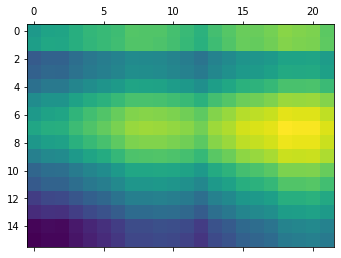

In [199]:
import matplotlib.pyplot as plt

plt.matshow(housing_data.corr().loc[np_cols, hv_cols])
plt.show()

In [200]:
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

NameError: name 'corr' is not defined

In [187]:
housing_data.corr()

,np_2007,np_2008,np_2009,np_2010,np_2011,np_2012,np_2013,np_2014,np_2015,np_2016,...,hv_2012,hv_2013,hv_2014,hv_2015,hv_2016,hv_2017,hv_2018,hv_2019,hv_2020,hv_2021
np_2007,1.000000,0.962250,0.897147,0.905540,0.909284,0.929654,0.909334,0.912314,0.895588,0.867208,...,0.169486,0.207701,0.231635,0.256803,0.256570,0.270088,0.291350,0.281781,0.278493,0.241289
np_2008,0.962250,1.000000,0.932953,0.931730,0.940528,0.941828,0.904757,0.906064,0.892678,0.861780,...,0.164596,0.201910,0.227491,0.252743,0.252329,0.264916,0.284162,0.277278,0.274973,0.242259
np_2009,0.897147,0.932953,1.000000,0.969765,0.959792,0.947358,0.895683,0.871698,0.862502,0.837280,...,-0.003935,0.034959,0.058854,0.084417,0.086802,0.101925,0.128083,0.127340,0.130055,0.108005
np_2010,0.905540,0.931730,0.969765,1.000000,0.974371,0.947847,0.901047,0.890316,0.883488,0.857776,...,0.010801,0.049306,0.073546,0.100216,0.103979,0.118346,0.145027,0.142835,0.144819,0.120576
np_2011,0.909284,0.940528,0.959792,0.974371,1.000000,0.969153,0.926334,0.914665,0.913329,0.892142,...,0.072510,0.114197,0.137999,0.167427,0.171052,0.187477,0.217217,0.217112,0.220066,0.194964
np_2012,0.929654,0.941828,0.947358,0.947847,0.969153,1.000000,0.974390,0.961953,0.953056,0.922421,...,0.168003,0.208753,0.230292,0.260038,0.265263,0.279213,0.309300,0.307513,0.310006,0.284259
np_2013,0.909334,0.904757,0.895683,0.901047,0.926334,0.974390,1.000000,0.984527,0.979250,0.939872,...,0.243272,0.285867,0.305405,0.336240,0.342825,0.353837,0.382367,0.376436,0.377287,0.346843
np_2014,0.912314,0.906064,0.871698,0.890316,0.914665,0.961953,0.984527,1.000000,0.991441,0.961832,...,0.267337,0.310874,0.330742,0.363334,0.371353,0.381789,0.410254,0.403649,0.403833,0.373426
np_2015,0.895588,0.892678,0.862502,0.883488,0.913329,0.953056,0.979250,0.991441,1.000000,0.978248,...,0.241778,0.287855,0.308765,0.342788,0.352077,0.363454,0.394433,0.388231,0.388416,0.356797
np_2016,0.867208,0.861780,0.837280,0.857776,0.892142,0.922421,0.939872,0.961832,0.978248,1.000000,...,0.187733,0.237540,0.259786,0.294990,0.305422,0.320813,0.356983,0.354135,0.356004,0.326533


In [142]:
year_list = [str(x) for x in range(2000,2022)]
for col in zillow_philly.columns:
    for year in year_list:
        if year in col:
            df = df.groupby(a, axis=1).mean()
            print(col)

2000-01-31
2000-02-29
2000-03-31
2000-04-30
2000-05-31
2000-06-30
2000-07-31
2000-08-31
2000-09-30
2000-10-31
2000-11-30
2000-12-31
2001-01-31
2001-02-28
2001-03-31
2001-04-30
2001-05-31
2001-06-30
2001-07-31
2001-08-31
2001-09-30
2001-10-31
2001-11-30
2001-12-31
2002-01-31
2002-02-28
2002-03-31
2002-04-30
2002-05-31
2002-06-30
2002-07-31
2002-08-31
2002-09-30
2002-10-31
2002-11-30
2002-12-31
2003-01-31
2003-02-28
2003-03-31
2003-04-30
2003-05-31
2003-06-30
2003-07-31
2003-08-31
2003-09-30
2003-10-31
2003-11-30
2003-12-31
2004-01-31
2004-02-29
2004-03-31
2004-04-30
2004-05-31
2004-06-30
2004-07-31
2004-08-31
2004-09-30
2004-10-31
2004-11-30
2004-12-31
2005-01-31
2005-02-28
2005-03-31
2005-04-30
2005-05-31
2005-06-30
2005-07-31
2005-08-31
2005-09-30
2005-10-31
2005-11-30
2005-12-31
2006-01-31
2006-02-28
2006-03-31
2006-04-30
2006-05-31
2006-06-30
2006-07-31
2006-08-31
2006-09-30
2006-10-31
2006-11-30
2006-12-31
2007-01-31
2007-02-28
2007-03-31
2007-04-30
2007-05-31
2007-06-30
2007-07-31

In [143]:
def zillowgbfunction(df):
    for x in [str(x) for x in range(2000,2022)]:
        if x in col:
            return year

In [ ]:
zillow_philly.groupby(lambda x: zillowgbfunction(zillow_philly, x, 'a')).sum()

Let's build a table.

In [67]:
hv_cols = ["hv_"+str(x) for x in range(2000, 2022)]
permit_cols = ["np_"+str(x) for x in range(2007, 2022)]
all_cols = list(["zipcode"])
all_cols.extend(hv_cols)
all_cols.extend(permit_cols)
all_cols

['zipcode',
 'hv_2000',
 'hv_2001',
 'hv_2002',
 'hv_2003',
 'hv_2004',
 'hv_2005',
 'hv_2006',
 'hv_2007',
 'hv_2008',
 'hv_2009',
 'hv_2010',
 'hv_2011',
 'hv_2012',
 'hv_2013',
 'hv_2014',
 'hv_2015',
 'hv_2016',
 'hv_2017',
 'hv_2018',
 'hv_2019',
 'hv_2020',
 'hv_2021',
 'np_2007',
 'np_2008',
 'np_2009',
 'np_2010',
 'np_2011',
 'np_2012',
 'np_2013',
 'np_2014',
 'np_2015',
 'np_2016',
 'np_2017',
 'np_2018',
 'np_2019',
 'np_2020',
 'np_2021']

In [68]:
housing_df = pd.DataFrame(columns=all_cols)

In [69]:
housing_df.head()

,zipcode,hv_2000,hv_2001,hv_2002,hv_2003,hv_2004,hv_2005,hv_2006,hv_2007,hv_2008,...,np_2012,np_2013,np_2014,np_2015,np_2016,np_2017,np_2018,np_2019,np_2020,np_2021


In [75]:
housing_dict = {}
for col in all_cols:
    housing_dict[col] = 5
    print(housing_dict)

{'zipcode': 5}
{'zipcode': 5, 'hv_2000': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5, 'hv_2003': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5, 'hv_2003': 5, 'hv_2004': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5, 'hv_2003': 5, 'hv_2004': 5, 'hv_2005': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5, 'hv_2003': 5, 'hv_2004': 5, 'hv_2005': 5, 'hv_2006': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5, 'hv_2003': 5, 'hv_2004': 5, 'hv_2005': 5, 'hv_2006': 5, 'hv_2007': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5, 'hv_2003': 5, 'hv_2004': 5, 'hv_2005': 5, 'hv_2006': 5, 'hv_2007': 5, 'hv_2008': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5, 'hv_2003': 5, 'hv_2004': 5, 'hv_2005': 5, 'hv_2006': 5, 'hv_2007': 5, 'hv_2008': 5, 'hv_2009': 5}
{'zipcode': 5, 'hv_2000': 5, 'hv_2001': 5, 'hv_2002': 5, 'hv_2003